In [1]:
# Figure 1

In [2]:
import re
import warnings

import cmaps 
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter)
from gcpy import single_panel 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np 
import regionmask
import scipy.stats as stats
from scipy.stats import gmean, gstd
import seaborn as sns 
import xarray as xr 

from src import tools

warnings.filterwarnings("ignore")

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
# Load observations: summer 
months = [7,7,6] # July observations in EAS are incomplete, so we use June
daily_mda8o3_ar6_ena = tools.get_observed_daily_mda8o3_ar6_afternoon("ENA", months[0], criteria=90, min_hour='12:00', max_hour='17:00')
daily_mda8o3_ar6_wce = tools.get_observed_daily_mda8o3_ar6_afternoon("WCE", months[1], criteria=90, min_hour='12:00', max_hour='17:00')
daily_mda8o3_ar6_eas = tools.get_observed_daily_mda8o3_ar6_afternoon("EAS", months[2], criteria=90, min_hour='12:00', max_hour='17:00')

In [4]:
# Load observations: winter 
months = [12, 12, 12]
daily_mda8o3_ar6_ena2 = tools.get_observed_daily_mda8o3_ar6_afternoon("ENA", months[0], min_hour='12:00', max_hour='17:00')
daily_mda8o3_ar6_wce2 = tools.get_observed_daily_mda8o3_ar6_afternoon("WCE", months[1], min_hour='12:00', max_hour='17:00')
daily_mda8o3_ar6_eas2 = tools.get_observed_daily_mda8o3_ar6_afternoon("EAS", months[2], min_hour='12:00', max_hour='17:00')

In [5]:
def _get_multiyear_variable_ds_c48(my_simulation, variable):
    """ Function concatenates processed variable files in analysis_data
        for a given simulation

    Args:
        my_simulation(str): example "w10_ref_c48"

        variable(str): example "EmisNO_Total"
    """

    regex_pattern = re.compile(fr"GCHP.{variable}.2")

    directory = f"/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240210/{my_simulation}/"
    file_list = tools.get_file_list(directory, regex_pattern)
    ds = tools.open_multifile_ds(file_list, compat_check=True)
    return ds

In [6]:
# Load GCHP_CAM model output
w10 = _get_multiyear_variable_ds_c48("w10_ref_c48", "MDA8_O3_afternoon")
w13 = _get_multiyear_variable_ds_c48("w13_ref_c48", "MDA8_O3_afternoon")
w14 = _get_multiyear_variable_ds_c48("w14_ref_c48", "MDA8_O3_afternoon")
w26 = _get_multiyear_variable_ds_c48("w26_ref_c48", "MDA8_O3_afternoon")
w28 = _get_multiyear_variable_ds_c48("w28_ref_c48", "MDA8_O3_afternoon")

ds_ref = xr.concat([w10, w13, w14, w26, w28], dim='sim')*1e9 # ppbv

ds_ref = ds_ref.sel(
            time=ds_ref.time.dt.month.isin([6, 7,12]))

In [7]:
# Load GCHP-M2 model output
M2 = _get_multiyear_variable_ds_c48("M2_ref_c48_fdr", "MDA8_O3_afternoon")*1e9
M2_pol = _get_multiyear_variable_ds_c48("M2_pol3.7_c48_edr", "MDA8_O3_afternoon")*1e9

['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w10_ref_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w13_ref_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w14_ref_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w26_ref_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w28_ref_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w10_refSNOx_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w13_refSNOx_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w14_refSNOx_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w26_refSNOx_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_da

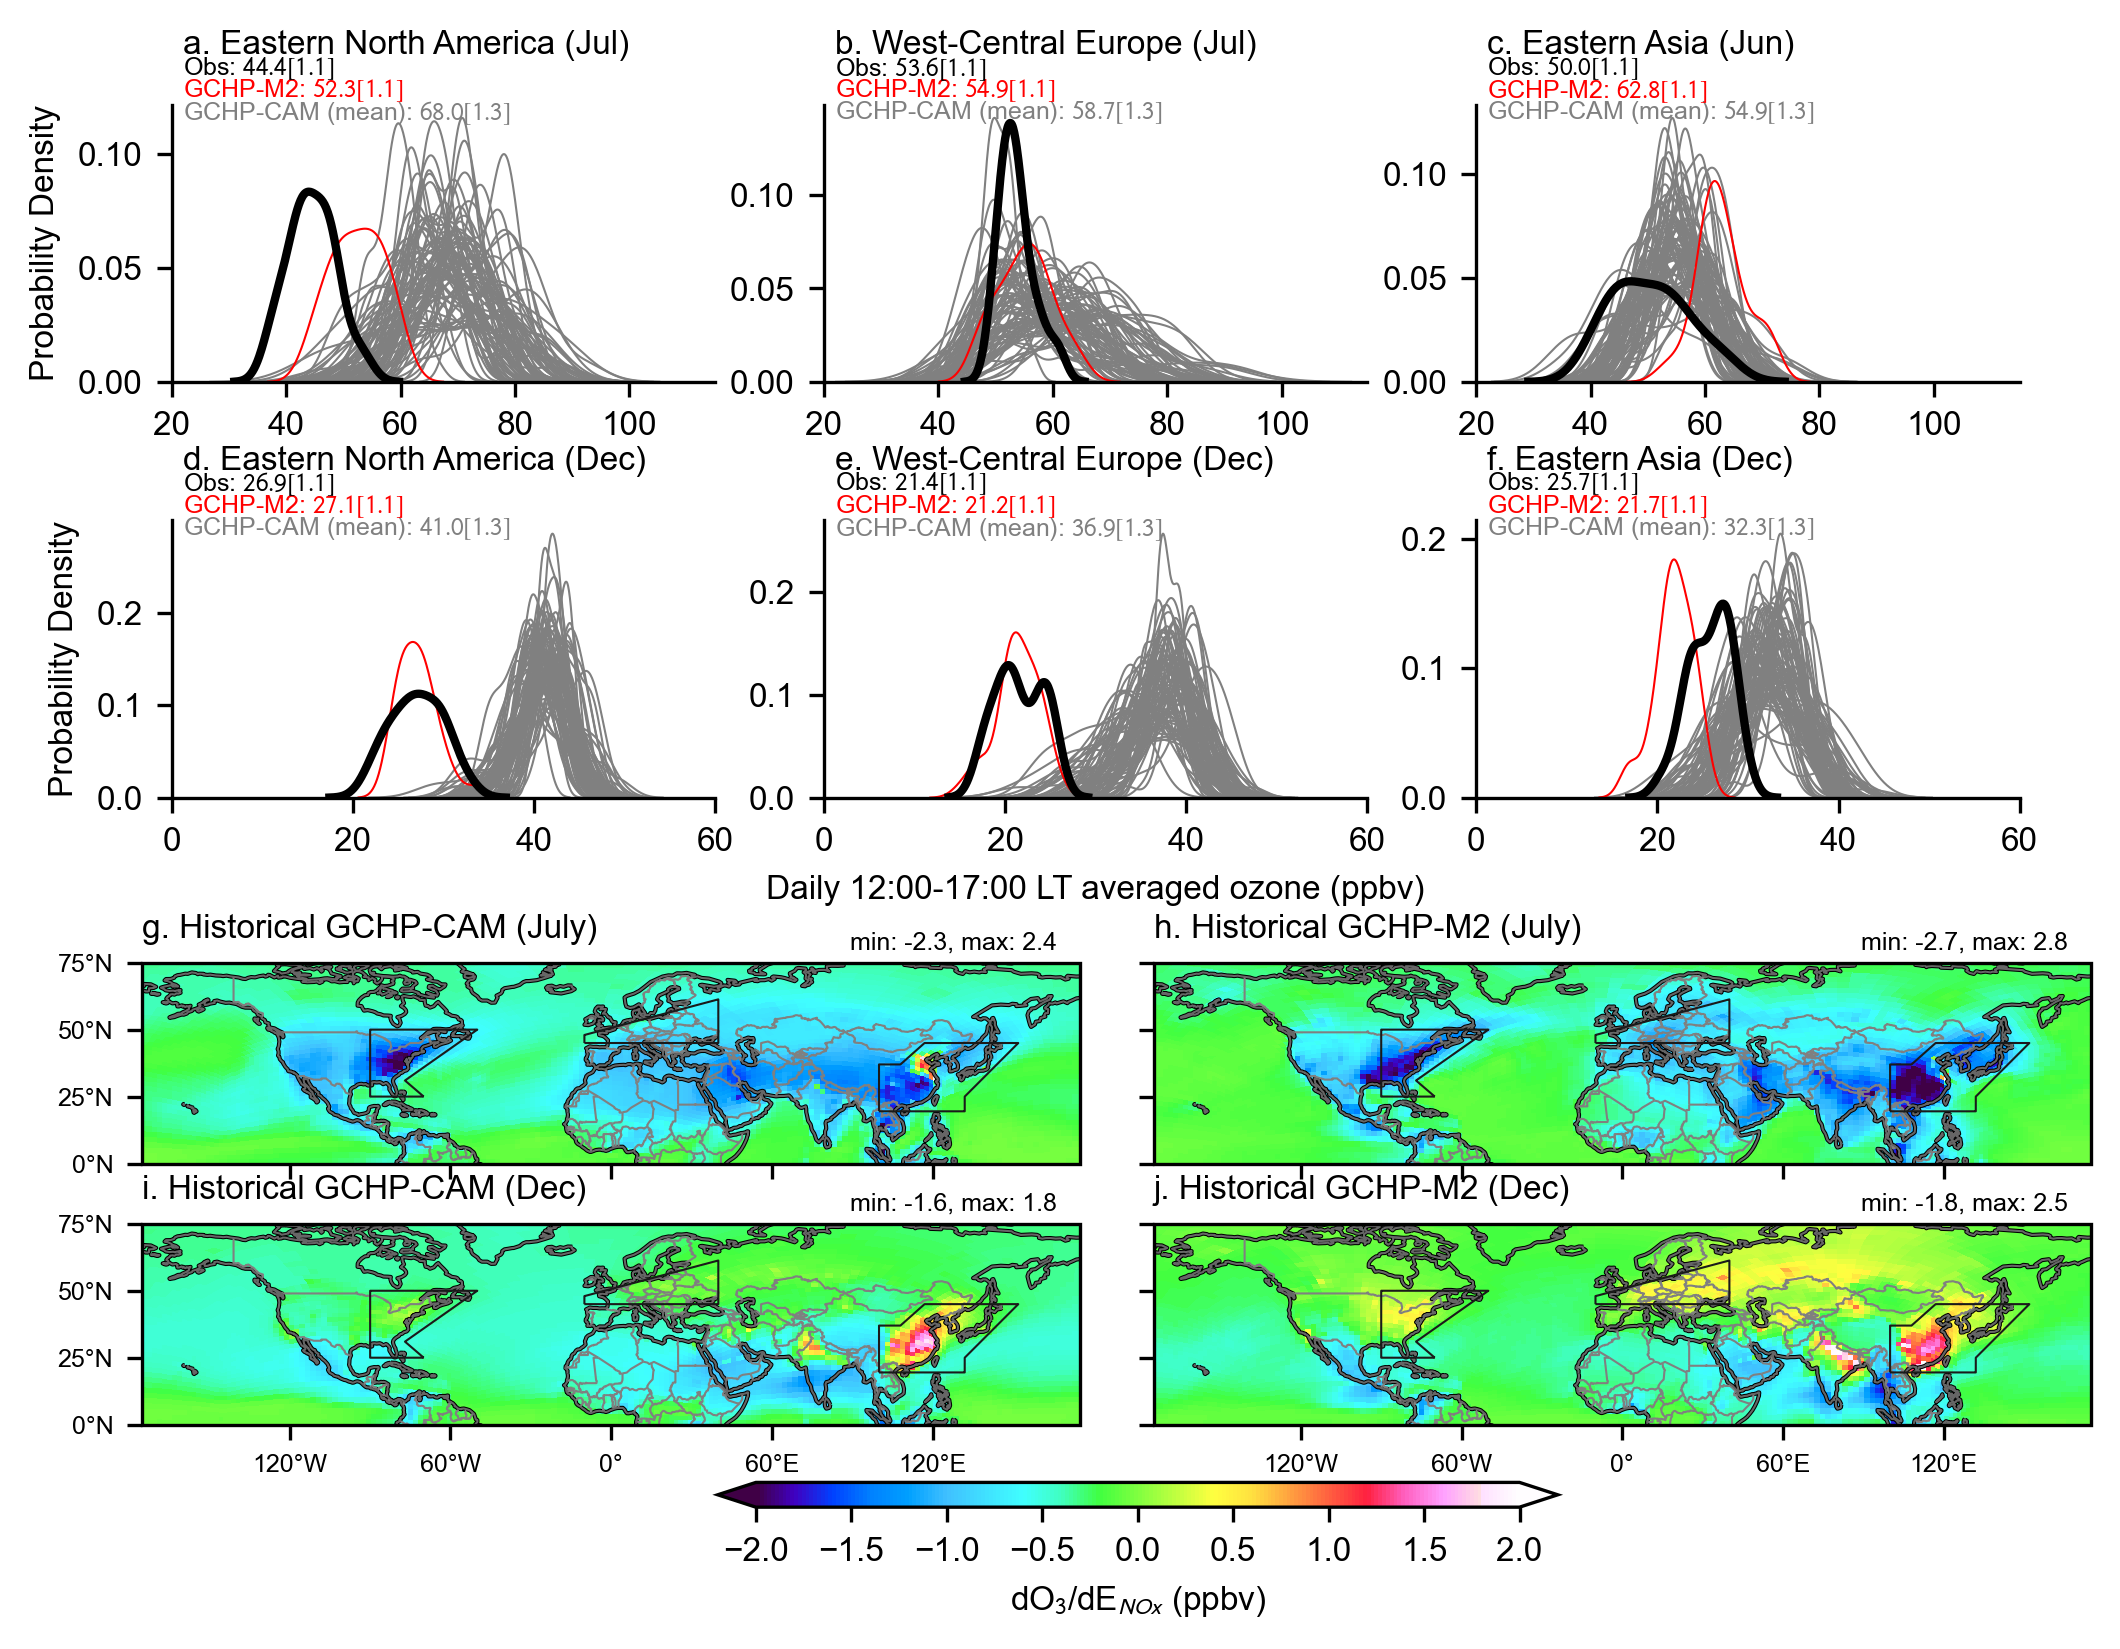

In [8]:
# Plot figure
tools.set_matplotlib_font("Arial")
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
    
color = 'black'

mpl.rcParams.update({
    'axes.edgecolor': color,      # Color of the axes spines
    'xtick.color': color,         # Color of the x-axis ticks
    'ytick.color': color,         # Color of the y-axis ticks
    'xtick.labelcolor': color,    # Color of the x-axis tick labels
    'ytick.labelcolor': color,    # Color of the y-axis tick labels
    'grid.color': color,          # Color of the grid lines
    'axes.labelcolor': color,     # Color of the axis labels
    'axes.titlecolor': color,     # Color of the plot titles
})

mpl.rcParams.update({
    'font.size': 8, 
    'axes.titlesize': 8, 
    'axes.labelsize': 8,
    'xtick.labelsize': 8, 
    'ytick.labelsize': 8, 
    'legend.fontsize': 8,
    'figure.titlesize': 8
})


fig_width_in = 7
fig_height_in = 5.5

fig = plt.figure(figsize=(fig_width_in, fig_height_in), dpi=300)

gs1 = GridSpec(2, 3, top=0.95, bottom=0.53, left=0.07, right=0.95, hspace=0.5, wspace=0.2)
ax1 = fig.add_subplot(gs1[0, 0])
ax2 = fig.add_subplot(gs1[0, 1])
ax3 = fig.add_subplot(gs1[0, 2])
ax4 = fig.add_subplot(gs1[1, 0])
ax5 = fig.add_subplot(gs1[1, 1])
ax6 = fig.add_subplot(gs1[1, 2])

ax = [ax1, ax2, ax3, ax4, ax5, ax6]

titles= ["a. Eastern North America (Jul)", "b. West-Central Europe (Jul)", "c. Eastern Asia (Jun)",
         "d. Eastern North America (Dec)", "e. West-Central Europe (Dec)", "f. Eastern Asia (Dec)"]
months = [7,7,6, 12,12,12]

GCHP_CAM_values = []
GCHP_M2_values = []

for idx, data in enumerate([daily_mda8o3_ar6_ena, daily_mda8o3_ar6_wce, daily_mda8o3_ar6_eas,
                            daily_mda8o3_ar6_ena2, daily_mda8o3_ar6_wce2, daily_mda8o3_ar6_eas2]):
    sitemean_mda8o3_ar6 = data.groupby("SITE_ID").mean()
    observation_mask = tools.get_observation_mask(sitemean_mda8o3_ar6)
    
    da_M2 = tools.get_masked_model_mda8o3(M2, observation_mask, months[idx])
    GCHP_M2_mean = da_M2.mean(dim=['nf', 'Ydim', 'Xdim'])
    GCHP_M2_values.append(GCHP_M2_mean)

    da_CAM = tools.get_masked_model_mda8o3(ds_ref, observation_mask, months[idx])
    GCHP_CAM_mean = da_CAM.mean(dim=['nf', 'Ydim', 'Xdim'])
    
    ###################
    means_ref = []
    stds_ref = []
    for sim in range(5):
        GCHP_sim_ref = GCHP_CAM_mean.isel(sim=sim)
        for year in range(2000, 2016): 
            GCHP_year_ref = GCHP_sim_ref.sel(time=GCHP_sim_ref.time.dt.year == year)
            sns.distplot(GCHP_year_ref, ax=ax[idx], hist=False, kde=True, kde_kws={'linewidth': 0.5}, color="grey")
            GCHP_CAM_values.append(GCHP_year_ref)

            if np.isnan(GCHP_year_ref.mean().values.item()):
                print(sim)
                print(year)
            else:
                means_ref.append(GCHP_year_ref.mean().values.item())
                stds_ref.append(GCHP_year_ref.std().values.item())

    model_mean_ref = np.mean(means_ref)
    model_geomean_ref = gmean(means_ref)
    model_std_ref = np.mean(stds_ref)
    model_geostd_ref = gstd(stds_ref)

    formatted_mmean_ref = format(model_mean_ref, ".1f")
    formatted_geommean_ref = format(model_geomean_ref, ".1f")
    formatted_mstdv_ref = format(model_std_ref, ".1f")
    formatted_geomstdv_ref = format(model_geostd_ref, ".1f")

    mtext_ref = r'GCHP-CAM (mean): ' + rf'${formatted_geommean_ref} [{formatted_geomstdv_ref}]$'

    ###################
    # Plot the distribution for each simulation and each year

    sns.distplot(GCHP_M2_mean, ax=ax[idx], hist=False, kde=True, kde_kws={'linewidth': 0.5}, color="red")
    model_mean = np.mean(GCHP_M2_mean.values)
    model_geomean = gmean(GCHP_M2_mean.values)
    model_std = np.std(GCHP_M2_mean.values)
    model_geomstd = gstd(GCHP_M2_mean.values)
    
    formatted_mmean = format(model_mean, ".1f")
    formatted_mgeommean = format(model_geomean, ".1f")
    formatted_mstdv = format(model_std, ".1f")
    formatted_mgeomstdv = format(model_geomstd, ".1f")

    # Plotting the distribution of the daily data mean
    daily_mean = data.groupby(['DATE']).mean()['O3_mda8']
    sns.distplot(daily_mean, ax=ax[idx], hist=False, kde=True, kde_kws={'linewidth': 2}, color='k')

    obs_mean = np.mean(daily_mean)
    obs_geommean = gmean(daily_mean)
    obs_std = np.std(daily_mean)
    obs_geomstd = gstd(daily_mean)
    
    formatted_omean = format(obs_mean, ".1f")
    formatted_ogeommean = format(obs_geommean, ".1f")
    formatted_ostdv = format(obs_std, ".1f")
    formatted_ogeomstdv = format(obs_geomstd, ".1f")

    mtext = r'GCHP-M2: ' + rf'${formatted_mgeommean} [{formatted_mgeomstdv}]$'
    otext = r'Obs: ' + rf'${formatted_ogeommean} [{formatted_ogeomstdv}]$'

    ax[idx].text(.02, 1.02, mtext_ref, ha='left', va='top', transform=ax[idx].transAxes, color='grey', fontsize=6)
    ax[idx].text(.02, 1.10, mtext, ha='left', va='top', transform=ax[idx].transAxes, color='red', fontsize=6)
    ax[idx].text(.02, 1.18, otext, ha='left', va='top', transform=ax[idx].transAxes, color='black', fontsize=6)
    ax[idx].text(.02, 1.27, titles[idx], ha='left', va='top', transform=ax[idx].transAxes, color='black', fontsize=8)

    plt.xlabel("MDA8 O$_3$ (ppbv)")
    ax[idx].spines[['right', 'top']].set_visible(False)

    if idx <3:
        ax[idx].set_xlim([20, 115])
    else:
        ax[idx].set_xlim([0, 60])

    ax[idx].spines[['right', 'top']].set_visible(False)
    ax[idx].set_xlabel(None)
    ax[idx].set_ylabel(None)

xlabel = "Daily 12:00-17:00 LT averaged ozone (ppbv)"
ax5.set_xlabel(xlabel, fontsize=8)

ylabel = "Probability Density"
ax1.set_ylabel(ylabel, fontsize=8)
ax4.set_ylabel(ylabel, fontsize=8)

gs2 = GridSpec(2, 2, top=0.43, bottom=0.15, left=0.05, right=0.99, hspace = 0.30, wspace=0.05)
ax7 = fig.add_subplot(gs2[0, 0], projection=ccrs.PlateCarree(central_longitude=0))
ax8 = fig.add_subplot(gs2[0, 1], projection=ccrs.PlateCarree(central_longitude=0))
ax9 = fig.add_subplot(gs2[1, 0], projection=ccrs.PlateCarree(central_longitude=0))
ax10 = fig.add_subplot(gs2[1, 1], projection=ccrs.PlateCarree(central_longitude=0))

ref_da = tools.get_ensemble_ds("ref", "MDA8_O3")*1e9 # ppbv
refSNOx_da = tools.get_ensemble_ds("refSNOx", "MDA8_O3")*1e9 # ppbv
refshort_da = tools.get_ensemble_ds("refshort", "MDA8_O3")*1e9 # ppbv
refSNOxshort_da = tools.get_ensemble_ds("refSNOxshort", "MDA8_O3")*1e9 # ppbv
M2_da = _get_multiyear_variable_ds_c48("M2_ref_c48_fdr", "MDA8_O3")*1e9
M2SNOx_da = _get_multiyear_variable_ds_c48("M2_refSNOx_c48_fdr", "MDA8_O3")*1e9

ax = [ax7, ax8, ax9, ax10]
titles= ["g. Historical GCHP-CAM (July)", "h. Historical GCHP-M2 (July)", "i. Historical GCHP-CAM (Dec)", "j. Historical GCHP-M2 (Dec)"]

# GCHP-CAM
gchp_cam = refSNOx_da-ref_da
gchp_cam_july = gchp_cam.sel(time=gchp_cam.time.dt.month.isin([7]))
gchp_cam_dec = gchp_cam.sel(time=gchp_cam.time.dt.month.isin([12]))

gchp_cam_july_z = gchp_cam_july['SpeciesConc_O3'].mean(dim=['time', 'sim'])
gchp_cam_dec_z = gchp_cam_dec['SpeciesConc_O3'].mean(dim=['time', 'sim'])

# GCHP-M2
gchp_m2 = M2SNOx_da - M2_da
gchp_m2_july = gchp_m2.sel(time=gchp_m2.time.dt.month.isin([7]))
gchp_m2_dec = gchp_m2.sel(time=gchp_m2.time.dt.month.isin([12]))

gchp_m2_july_z = gchp_m2_july['SpeciesConc_O3'].mean(dim=['time'])
gchp_m2_dec_z = gchp_m2_dec['SpeciesConc_O3'].mean(dim=['time'])

for idx, z in enumerate([gchp_cam_july_z, gchp_m2_july_z, gchp_cam_dec_z, gchp_m2_dec_z]):

    cmap = cmaps.GMT_wysiwygcont
    plot = single_panel(plot_vals=z, 
                ax=ax[idx], gridtype="cs", 
                comap=cmap,
                extent=(-175, 175, 0, 75), 
                vmin=-2, vmax=2,
                unit="ppbv",
                title=None,
                add_cb=False)

    ax[idx].coastlines(linewidth=0.5)
    country_borders = cfeature.NaturalEarthFeature(
        category="cultural",
        name="admin_0_boundary_lines_land",
        scale="50m",
        facecolor="none",
    )
    ax[idx].add_feature(country_borders, edgecolor="gray", linewidth=0.5)
    ax[idx].set_extent([-175, 175, 0, 75], crs=ccrs.PlateCarree())
    ax[idx].set_title(titles[idx], loc='left', size=8)

    if idx > 1: # bottom panels have xticklabels
        ax[idx].set_xticks([-120, -60, 0, 60, 120])
        ax[idx].set_xticklabels(
            ['120°W', '60°W', '0°', '60°E', '120°E'], fontsize=6)
        ax[idx].set_yticks([0,25,50,75])
        ax[idx].set_yticklabels(
            ['0°N', '25°N', '50°N', '75°N'], fontsize=6)
    else:
        ax[idx].set_xticks([-120, -60, 0, 60, 120])
        ax[idx].set_xticklabels(['', '', '', '', ''], fontsize=6)
        ax[idx].set_yticks([0,25,50,75])
        ax[idx].set_yticklabels(
            ['0°N', '25°N', '50°N', '75°N'], fontsize=6)

    ax8.set_yticklabels(
            ['', '', '', ''], fontsize=8)
    ax10.set_yticklabels(
            ['', '', '', ''], fontsize=8)

    # Add boxes around the IPCC AR6 regions
    ar6 = regionmask.defined_regions.ar6.all
    ar6[5,17,35].plot(ax=ax[idx],
        add_ocean=False,
        projection=ccrs.PlateCarree(),
        add_label=False,
        line_kws=dict(lw=0.5)
    )

    ax[idx].annotate("min: "+"{:.1f}".format(z.min().values)+", max: "+"{:.1f}".format(z.max().values), (89,80), size=6)
    

ticks = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]

cbar_ax = fig.add_axes([0.33, 0.10, 0.4, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(plot,  
                    cax=cbar_ax, 
                    ticks=ticks, 
                    orientation="horizontal", 
                    shrink=0.50, 
                    label='dO$_3$/dE$_{NOx}$ (ppbv)',
                    extend='both'
                    )
cbar.ax.tick_params(labelsize=8)

plt.savefig("Fig1.pdf")

In [9]:
p_normals = []
p_log_normals = []
for idx in range(6):
    data = GCHP_M2_values[idx]

    my_data = data
    # Shapiro-Wilk Test for normality
    stat_normal, p_normal = stats.shapiro(my_data)
    p_normals.append(p_normal)
    print(f"Shapiro-Wilk Test for Normality: Statistic={stat_normal}, p-value={p_normal}")

    # Log-transform and test for log-normality
    log_data = np.log(my_data - np.min(my_data) + 1)  # Adjusting data for log transformation
    stat_log_normal, p_log_normal = stats.shapiro(log_data)
    p_log_normals.append(p_log_normal)
    print(f"Shapiro-Wilk Test for Log-Normality: Statistic={stat_log_normal}, p-value={p_log_normal}")


Shapiro-Wilk Test for Normality: Statistic=0.9727481007575989, p-value=0.597495973110199
Shapiro-Wilk Test for Log-Normality: Statistic=0.8758150339126587, p-value=0.0018927452620118856
Shapiro-Wilk Test for Normality: Statistic=0.9711967706680298, p-value=0.5525705218315125
Shapiro-Wilk Test for Log-Normality: Statistic=0.8520541787147522, p-value=0.0005605202750302851
Shapiro-Wilk Test for Normality: Statistic=0.9613279700279236, p-value=0.33480697870254517
Shapiro-Wilk Test for Log-Normality: Statistic=0.7909684181213379, p-value=4.507631456363015e-05
Shapiro-Wilk Test for Normality: Statistic=0.9459593296051025, p-value=0.12067978084087372
Shapiro-Wilk Test for Log-Normality: Statistic=0.9724085330963135, p-value=0.5875368714332581
Shapiro-Wilk Test for Normality: Statistic=0.9585466384887695, p-value=0.2669093608856201
Shapiro-Wilk Test for Log-Normality: Statistic=0.7827087640762329, p-value=2.5102119252551347e-05
Shapiro-Wilk Test for Normality: Statistic=0.961453378200531, p-va